Name :Jainam Rajput

SAP ID : 60009200022

Div/Batch : K/K1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Question 1**

In [ ]:
def calculate_prior(data,y):
  classes = sorted(list(data[y].unique()))
  prior = []
  for i in classes:
    prior.append(len(data[data[y]==i])/len(data))
  return prior

In [ ]:
def calc_likelyhood_gaussian(df, feat_name, feat_val, Y, label):
  feat = list(df.columns)
  df = df[df[Y]==label]
  mean, std = df[feat_name].mean(), df[feat_name].std()
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((feat_val-mean)**2 / (2*std**2 )))
  return p_x_given_y

In [ ]:
def naive_bayes_gaussian(df,X,y):
  feature = list(df.columns)[:-1]
  prior = calculate_prior(df,y)
  yhat = []
  for x in X:
    labels = sorted(list(df[y].unique()))
    likelyhood = [1]*len(labels)
    for i in range(len(labels)):
      for j in range(len(feature)):
        likelyhood[i] *= calc_likelyhood_gaussian(df,feature[i],X[i],y,labels[i])
    post_prob = [1]*len(labels)    
    for j in range(len(labels)):
      post_prob[j] = likelyhood[i]*prior[i]
    yhat.append(np.argmax(post_prob))
  return np.array(yhat)

In [ ]:
data1 = pd.read_csv('/content/Breast_cancer_data.csv')
data1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
data1.duplicated().sum()

0

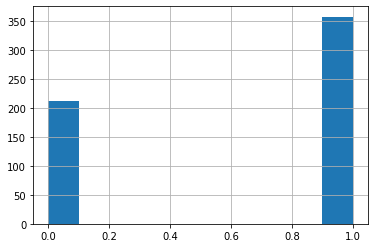

In [ ]:
data1["diagnosis"].hist()

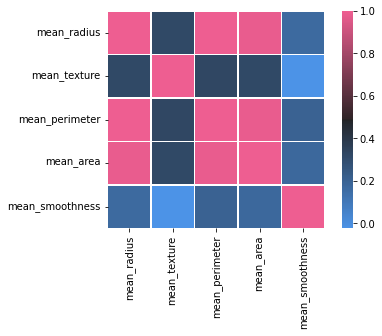

In [ ]:
corr = data1.iloc[:,:-1].corr(method='pearson')
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True) 
sns.heatmap(corr,vmax=1,cmap=cmap,square=True,linewidth=0.2)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
data1 = data1[['mean_radius','mean_texture','mean_smoothness','diagnosis']]
data1

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


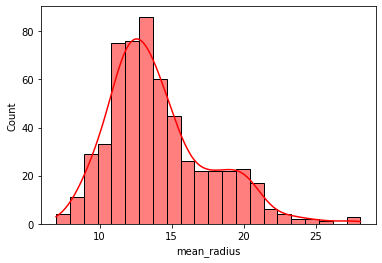

In [ ]:
sns.histplot(data1,x='mean_radius',kde=True,color='r')

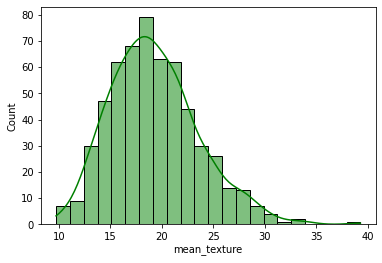

In [ ]:
sns.histplot(data1,x='mean_texture',kde=True,color='g')

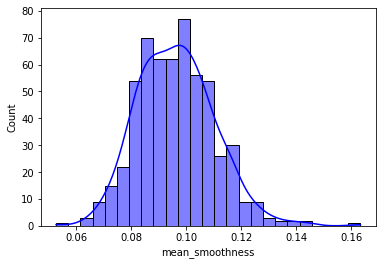

In [ ]:
sns.histplot(data1,x='mean_smoothness',kde=True,color='b')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data1, test_size=.25, random_state=41)
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, y="diagnosis")

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [ ]:
print(f"Accuracy Score is {accuracy_score(Y_test,Y_pred)}")
print(f"Confusion matrix:\n {confusion_matrix(Y_test, Y_pred)}")

Accuracy Score is 0.3706293706293706
Confusion matrix:
 [[53  0]
 [90  0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


**2nd Dataset**

In [ ]:
data = pd.read_csv('Datasets/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
label_encode = LabelEncoder()
data["Gender"] = label_encode.fit_transform(data["Gender"])
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=41)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()

In [ ]:
naive.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
yhat = naive.predict(x_test) 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print(f"Accuracy is {accuracy_score(y_test,yhat)}")

Accuracy is 0.8833333333333333


In [ ]:
cm = confusion_matrix(y_test,yhat)

In [ ]:
cm

array([[73,  4],
       [10, 33]])

**3rd Dataset**

In [ ]:
df = pd.read_csv('Datasets/german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.fillna(df['Checking account'].value_counts().index[0],inplace= True)

In [ ]:
df.fillna(df['Saving accounts'].value_counts().index[0],inplace= True)

In [ ]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encode = LabelEncoder()
df["Sex"] = label_encode.fit_transform(df["Sex"])
df["Housing"] = label_encode.fit_transform(df["Housing"])
df["Purpose"] = label_encode.fit_transform(df["Purpose"])
df["Saving accounts"] = label_encode.fit_transform(df["Saving accounts"])
df["Checking account"] = label_encode.fit_transform(df["Checking account"])
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,0,1169,6,5,good
1,1,22,0,2,1,0,1,5951,48,5,bad
2,2,49,1,1,1,0,0,2096,12,3,good
3,3,45,1,2,0,0,0,7882,42,4,good
4,4,53,1,2,0,0,0,4870,24,1,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1,1,0,0,1736,12,4,good
996,996,40,1,3,1,0,0,3857,30,1,good
997,997,38,1,2,1,0,0,804,12,5,good
998,998,23,1,2,0,0,0,1845,45,5,bad


In [ ]:
df["Risk"] = label_encode.fit_transform(df["Risk"])

In [ ]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0
2,2,49,1,1,1,0,0,2096,12,3,1
3,3,45,1,2,0,0,0,7882,42,4,1
4,4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1,1,0,0,1736,12,4,1
996,996,40,1,3,1,0,0,3857,30,1,1
997,997,38,1,2,1,0,0,804,12,5,1
998,998,23,1,2,0,0,0,1845,45,5,0


In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gauss = GaussianNB()

In [ ]:
x1 = df.iloc[:,:-1].values
y1 = df.iloc[:,-1].values.reshape(-1,1)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.20,random_state=1)

In [ ]:
gauss.fit(x_train1,y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
yhat2 = gauss.predict(x_test1)

In [ ]:
print(f"Accuracy is {accuracy_score(y_test1,yhat2)}")

Accuracy is 0.72


In [ ]:
cm1 = confusion_matrix(y_test1,yhat2)

In [ ]:
cm1

array([[ 21,  38],
       [ 18, 123]])